In [3]:
import tempun
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

let's load the shipwrecks dataset...

In [19]:
shipwrecks = pd.read_csv("../data/oxrep_shipwrecksdatabase20230725.csv", encoding="latin-1")
shipwrecks.head(100)

,country,site_area,sitename,locname,localt,locheight,recs,post_0,ante_0,fs_provenance,fs_destination,fs_amph,fs_ma,fs_col,fs_blck,fs_sarc
0,Albany,Adriatic,Butrint,Butrint 1,-30.0,10.0,1,-300.0,-275.0,NaN,NaN,41.0,NaN,NaN,NaN,NaN
1,Albany,Adriatic,Butrint,Butrint 2,0.0,0.0,1,50.0,200.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN
2,Albany,Adriatic,Butrint,Butrint 3,0.0,0.0,1,-600.0,-400.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN
3,Albany,Adriatic,Cape Qefalit,Cape Qefalit,NaN,NaN,1,-520.0,-480.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,Albany,Adriatic,Porto Palermo,Porto Palermo,0.0,0.0,1,400.0,500.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Croatia,Adriatic,Silba,Silba C,NaN,NaN,1,-150.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Croatia,Adriatic,Silba,Silba D,NaN,NaN,1,1000.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Croatia,Adriatic,Skolj od Volam,Skolj od Volam,-41.0,3.0,1,1.0,100.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
98,Croatia,Adriatic,Skoljic,Skoljic,NaN,NaN,1,50.0,150.0,Northern Italy,NaN,104.0,NaN,NaN,NaN,NaN


In [11]:
shipwrecks.columns

Index(['country', 'site_area', 'sitename', 'locname', 'localt', 'locheight',
       'recs', 'post_0', 'ante_0', 'fs_provenance', 'fs_destination',
       'fs_amph', 'fs_ma', 'fs_col', 'fs_blck', 'fs_sarc'],
      dtype='object')

In [28]:
shipwrecks["random_dates"] = shipwrecks.apply(lambda row: tempun.model_date(row["post_0"], row["ante_0"], size=100, seed=row["index_id"]), axis=1)

In [24]:
shipwrecks.head(10)

,country,site_area,sitename,locname,localt,locheight,recs,post_0,ante_0,fs_provenance,fs_destination,fs_amph,fs_ma,fs_col,fs_blck,fs_sarc,random_dates
0,Albany,Adriatic,Butrint,Butrint 1,-30.0,10.0,1,-300.0,-275.0,NaN,NaN,41.0,NaN,NaN,NaN,NaN,"[-279, -279, -293, -286, -279, -293, -284, -27..."
1,Albany,Adriatic,Butrint,Butrint 2,0.0,0.0,1,50.0,200.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,"[192, 177, 87, 193, 54, 67, 125, 99, 140, 127,..."
2,Albany,Adriatic,Butrint,Butrint 3,0.0,0.0,1,-600.0,-400.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,"[-433, -407, -558, -591, -507, -437, -430, -40..."
3,Albany,Adriatic,Cape Qefalit,Cape Qefalit,NaN,NaN,1,-520.0,-480.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,"[-493, -498, -503, -504, -517, -514, -514, -51..."
4,Albany,Adriatic,Porto Palermo,Porto Palermo,0.0,0.0,1,400.0,500.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"[440, 426, 476, 468, 446, 443, 427, 492, 429, ..."
5,Albany,Adriatic,Qefalit,Qefalit Tile wreck,0.0,0.0,1,-400.0,-300.0,Corinth,NaN,2.0,NaN,NaN,NaN,NaN,"[-333, -352, -383, -393, -371, -397, -376, -34..."
6,Albany,Adriatic,Rodon,Rodon,0.0,0.0,1,-525.0,-475.0,Corinth,NaN,1.0,NaN,NaN,NaN,NaN,"[-510, -481, -488, -520, -511, -488, -494, -49..."
7,Albany,Adriatic,Saranda,Saranda 1,-78.0,0.0,1,-600.0,-450.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"[-537, -543, -593, -509, -534, -469, -473, -47..."
8,Albany,Adriatic,Saranda,Saranda 2,0.0,0.0,1,-400.0,-300.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"[-365, -383, -356, -377, -337, -350, -306, -38..."
9,Albany,Adriatic,Saranda,Saranda 3,0.0,0.0,1,1.0,200.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"[25, 126, 39, 107, 102, 15, 177, 187, 74, 69, ..."


[[<matplotlib.patches.Polygon at 0x1300c43a0>],

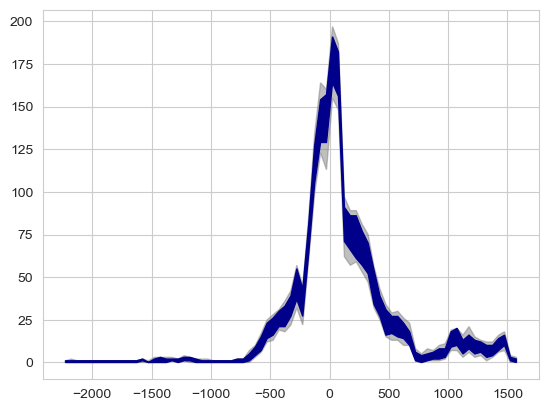

In [29]:
tempun.timeblocksplot_from_randoms(shipwrecks["random_dates"], random_size=100, color="darkblue")

(-850.0, 850.0)

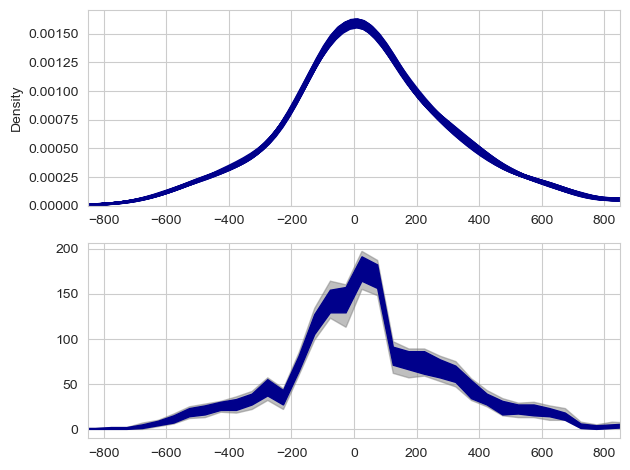

In [33]:
fig, [ax1, ax2] = plt.subplots(2,1, tight_layout=True)
tempun.kdeplot_from_randoms(shipwrecks["random_dates"], random_size=100, color="darkblue", ax=ax1)
ax1.set_xlim(-850,850)
tempun.timeblocksplot_from_randoms(shipwrecks["random_dates"], random_size=100, color="darkblue", ax=ax2)
ax2.set_xlim(-850,850)